In [1]:
import matplotlib.pyplot as plt
ms = 50
n_tasks = 512
subtitle = f"n_tasks = {n_tasks}, each task is {ms}ms"
x_axis_workers = [1, 2, 4, 8, 10, 12, 16, 20, 26, 30, 36, 42, 48, 54, 60, 64]
target = [(ms * n_tasks)/i for i in x_axis_workers]
print(target)

[25600.0, 12800.0, 6400.0, 3200.0, 2560.0, 2133.3333333333335, 1600.0, 1280.0, 984.6153846153846, 853.3333333333334, 711.1111111111111, 609.5238095238095, 533.3333333333334, 474.0740740740741, 426.6666666666667, 400.0]


# Processes

In [2]:
processes = [
    [1024, [25699.921, 12857.601, 6441.019, 3235.169, 2628.165, 2226.027, 1694.195, 1426.066, 1096.637, 1098.296, 975.166, 745.479, 795.168, 882.242, 1152.815, 627.56]],
    [4096, [25719.471, 12869.235, 6458.737, 3240.425, 2632.546, 2187.618, 1648.372, 1342.097, 1052.363, 946.084, 827.467, 725.294, 641.104, 588.912, 549.929, 560.425]],
    [8192, [25737.79, 12890.722, 6453.434, 3243.823, 2633.847, 2188.944, 1743.829, 1346.26, 1067.876, 928.698, 801.937, 727.228, 648.146, 586.177, 565.574, 587.031]],
    [16384, [25775.365, 12909.929, 6463.199, 3249.4, 2638.516, 2192.963, 1653.934, 1372.765, 1073.932, 931.267, 791.253, 747.813, 654.507, 708.87, 705.923, 776.048]],
    [32768, [25849.542, 12935.373, 6483.689, 3269.923, 2647.207, 2200.5, 1754.808, 1384.225, 1065.127, 936.532, 811.239, 757.65, 707.348, 663.937, 763.667, 751.089]],
    [65536, [26011.33, 13033.422, 6540.711, 3288.314, 2668.016, 2219.53, 1741.175, 1480.874, 1077.376, 1009.544, 861.761, 831.897, 825.241, 724.99, 886.082, 846.312]],
    [524288, [28290.56, 14207.796, 7188.857, 3683.964, 2968.039, 2769.207, 2665.067, 2716.641, 2716.014, 2740.409, 2757.61, 2899.063, 2836.671, 2854.219, 2904.343, 3977.715]],
    [1048576, [30952.983, 15521.733, 7837.653, 5348.506, 5354.862, 5335.201, 5341.353, 5422.222, 5295.457, 5310.081, 5282.572, 5325.897, 5379.588, 5394.546, 5447.574, 7617.518]],
]

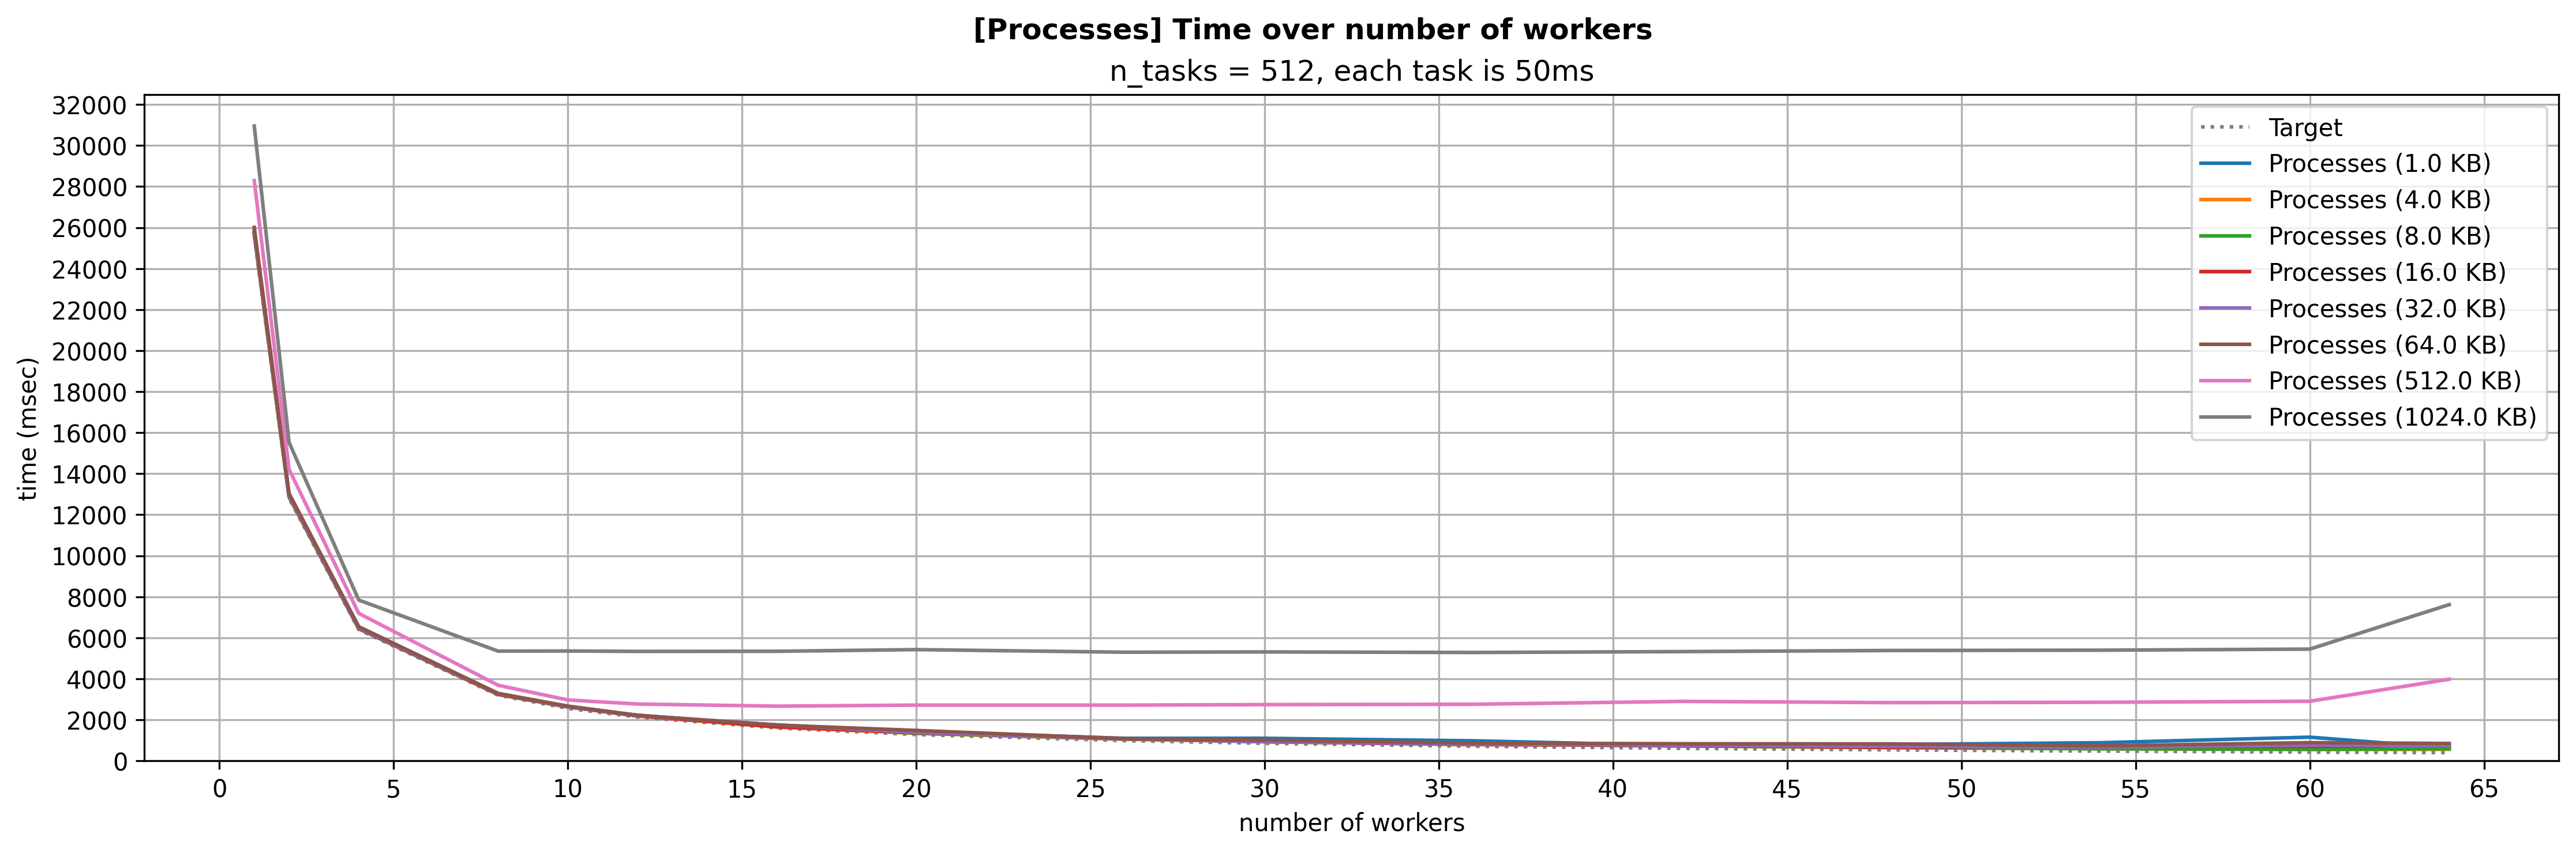

In [3]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes:
    plt.plot(x_axis_workers, res[1], label=f"Processes ({res[0] / 1024} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Processes] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Subinterpreters

In [4]:
subinterpreters = [
    [1024, [25715.454, 12910.117, 6525.265, 3345.488, 2717.39, 2302.908, 1816.983, 1507.073, 1259.975, 1188.18, 1094.897, 1050.69, 1001.322, 1030.547, 1020.312, 1058.798]],
    [4096, [25737.9, 12919.113, 6529.449, 3358.096, 2775.554, 2305.914, 1828.406, 1500.324, 1306.393, 1201.502, 1110.086, 1065.954, 1005.302, 1012.394, 1010.54, 1062.273]],
    [8192, [25753.87, 12921.833, 6531.109, 3353.923, 2729.464, 2301.214, 1817.903, 1543.998, 1270.84, 1203.052, 1110.158, 1062.782, 1012.376, 1025.382, 1020.192, 1062.525]],
    [16384, [25786.913, 12942.181, 6536.969, 3357.719, 2719.17, 2315.596, 1838.529, 1517.815, 1273.357, 1189.689, 1127.309, 1056.278, 1034.64, 1012.302, 1028.867, 1114.469]],
    [32768, [25858.693, 12972.557, 6544.35, 3364.174, 2740.711, 2359.889, 1833.867, 1510.578, 1317.722, 1215.491, 1101.249, 1059.469, 1036.908, 1025.585, 1032.312, 1071.178]],
    [65536, [25962.14, 13048.573, 6589.976, 3379.55, 2745.638, 2321.066, 1842.767, 1565.448, 1268.4, 1198.39, 1116.59, 1081.704, 1038.02, 1008.892, 1034.613, 1060.659]],
    [524288, [27846.516, 13986.605, 7075.707, 3652.656, 2976.584, 2558.977, 2397.759, 2421.365, 2494.465, 2534.668, 2660.185, 2904.819, 2723.644, 2826.574, 3065.846, 3247.174]],
    [1048576, [29993.647, 15051.663, 7616.295, 4500.883, 4514.186, 4461.724, 4546.902, 4632.774, 4661.351, 4707.381, 4908.726, 4740.684, 4888.974, 5028.804, 6230.495, 6570.184]],
]

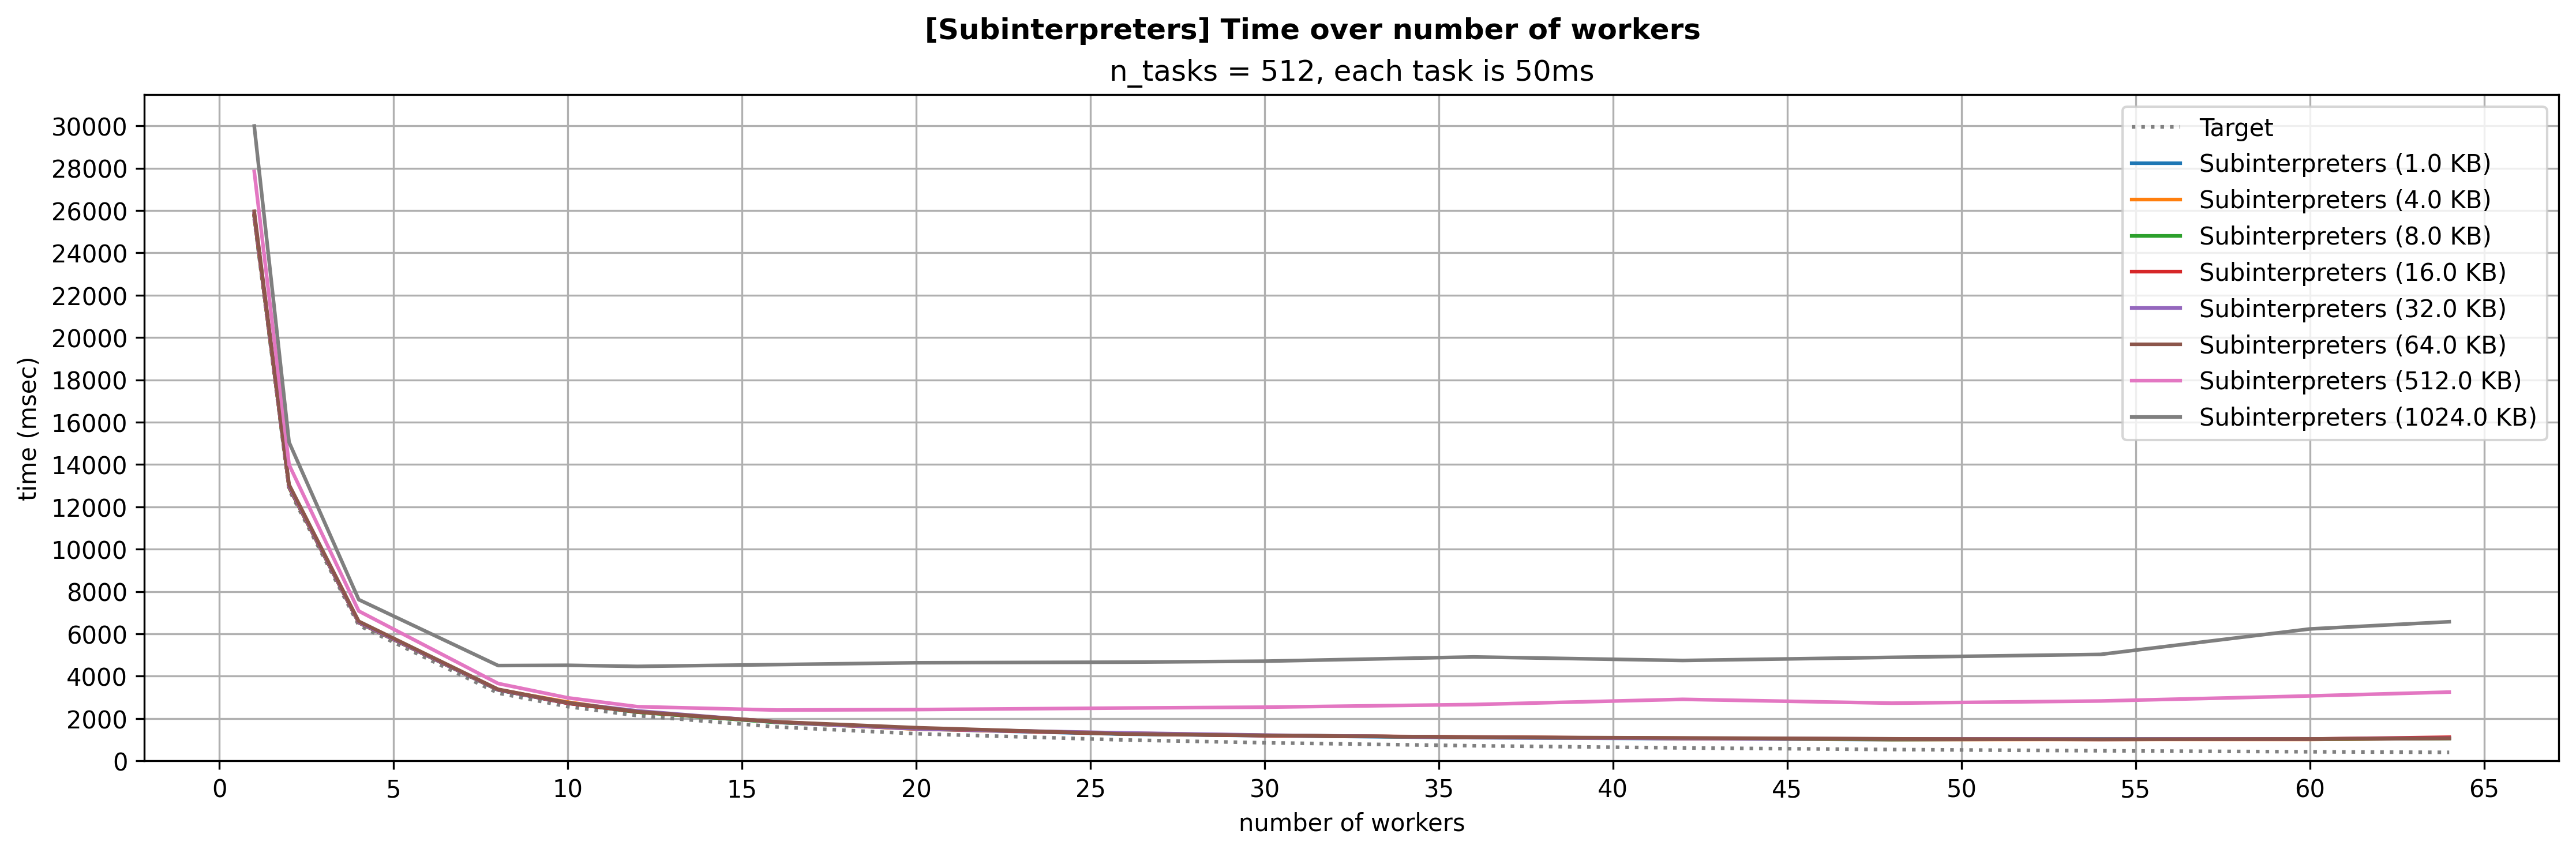

In [5]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in subinterpreters:
    plt.plot(x_axis_workers, res[1], label=f"Subinterpreters ({res[0] / 1024} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Subinterpreters] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Comparison

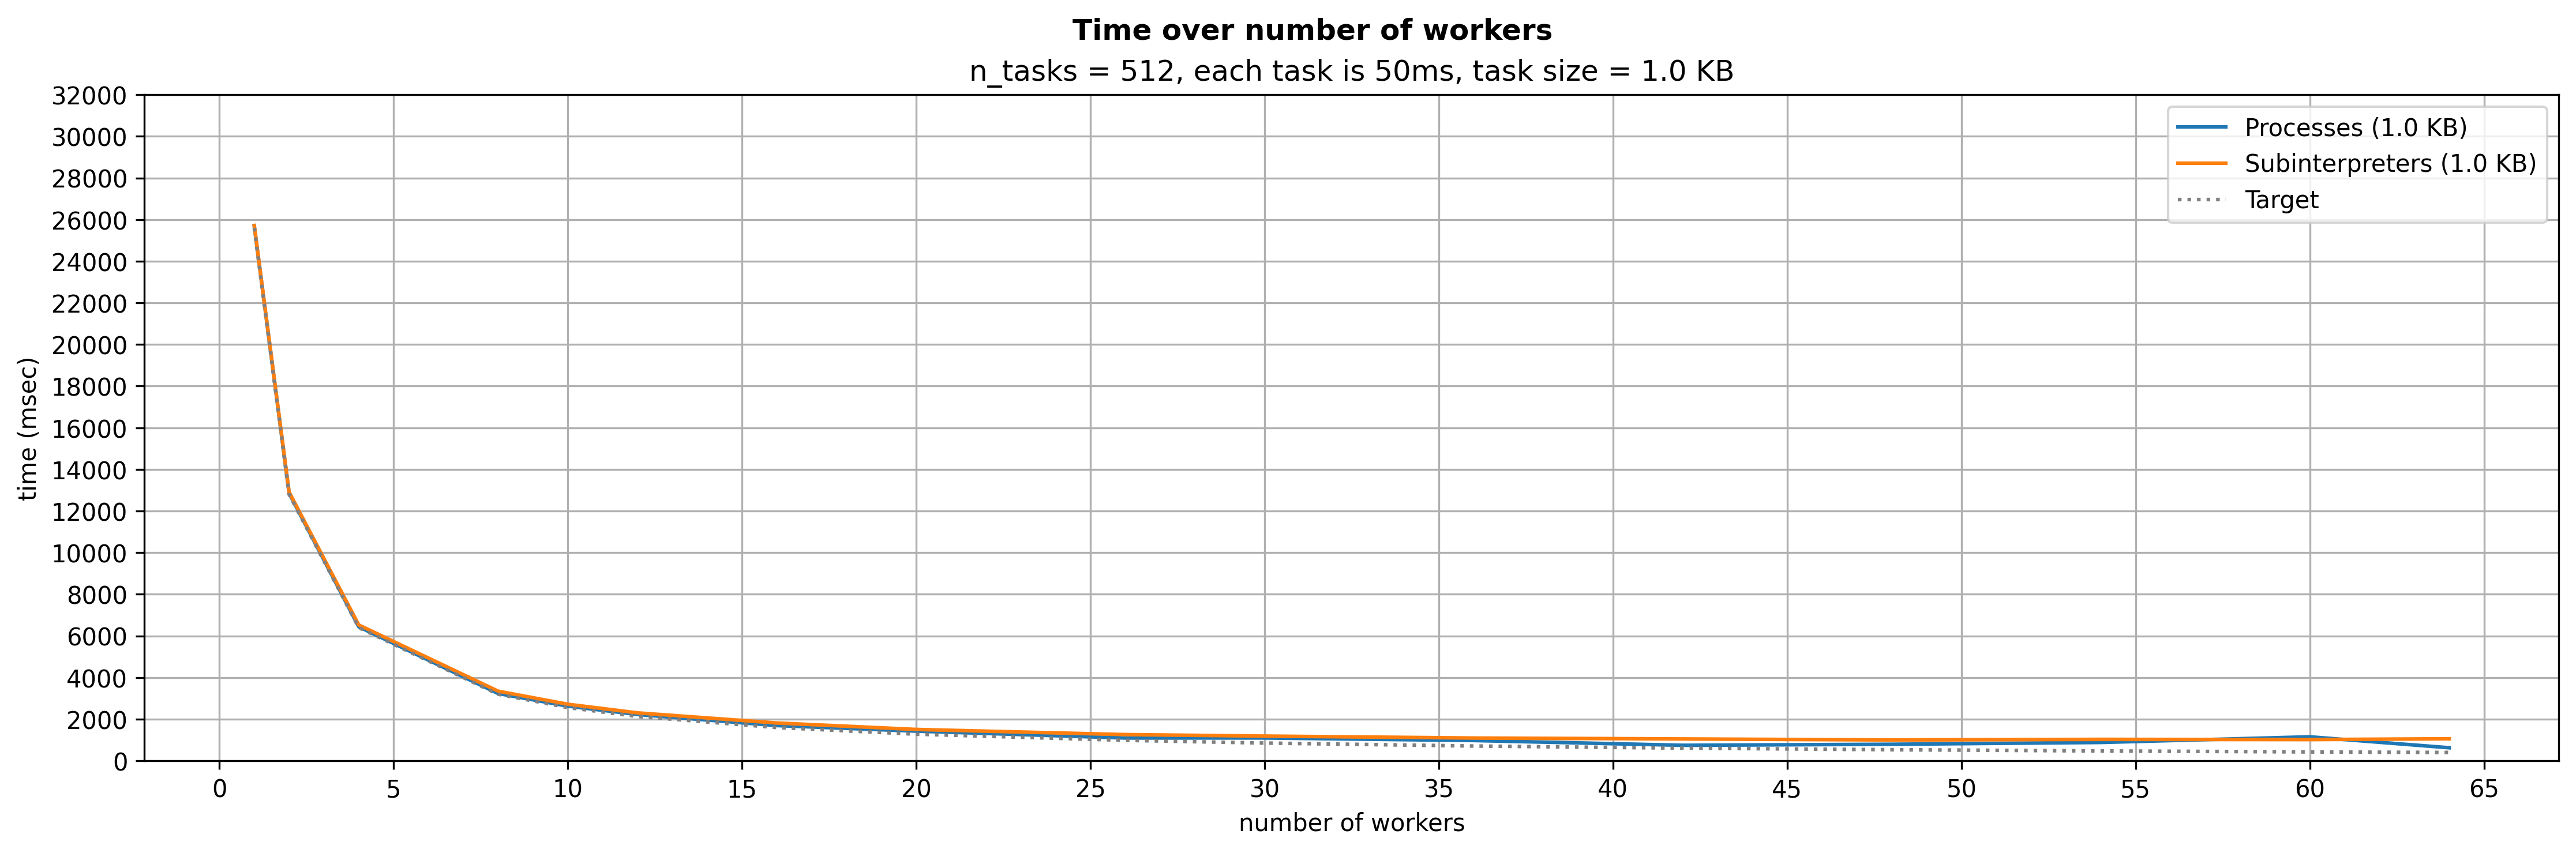

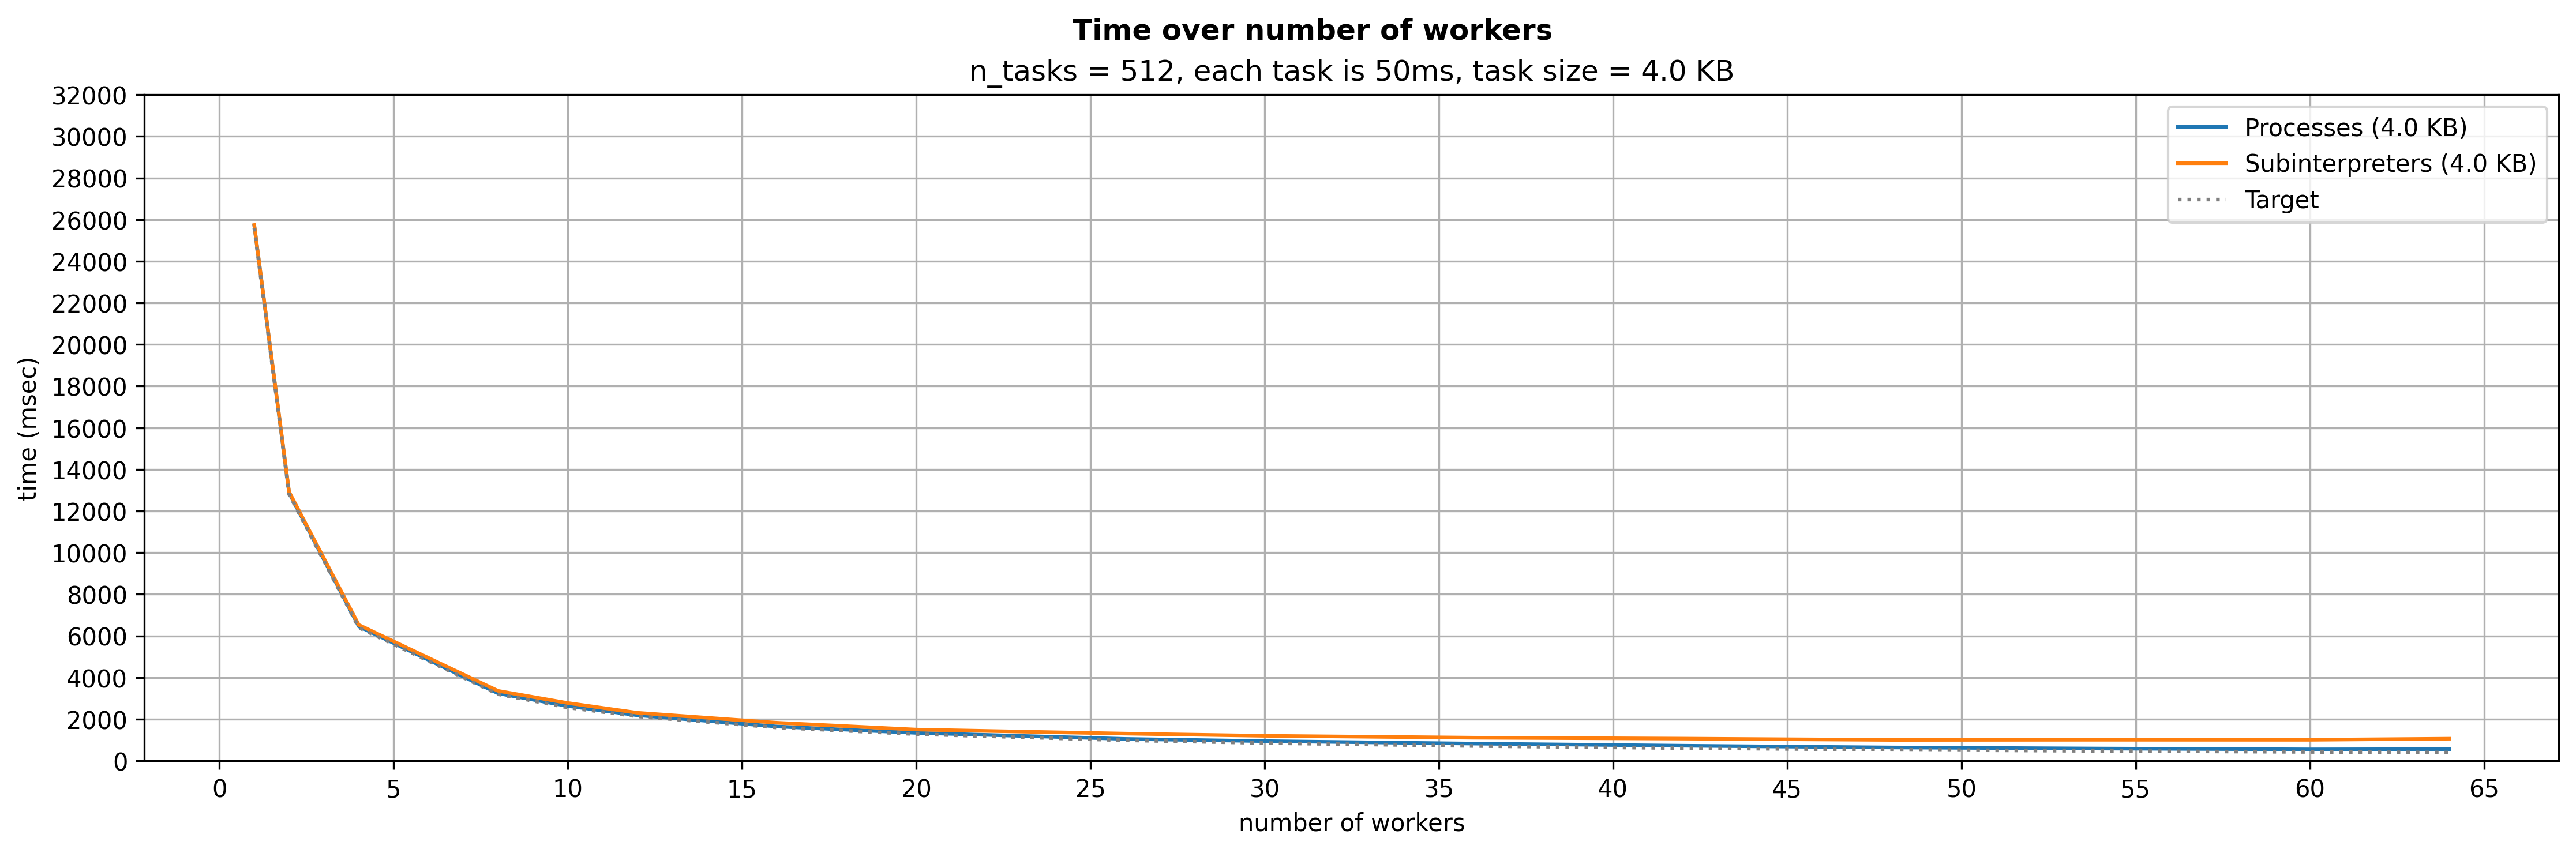

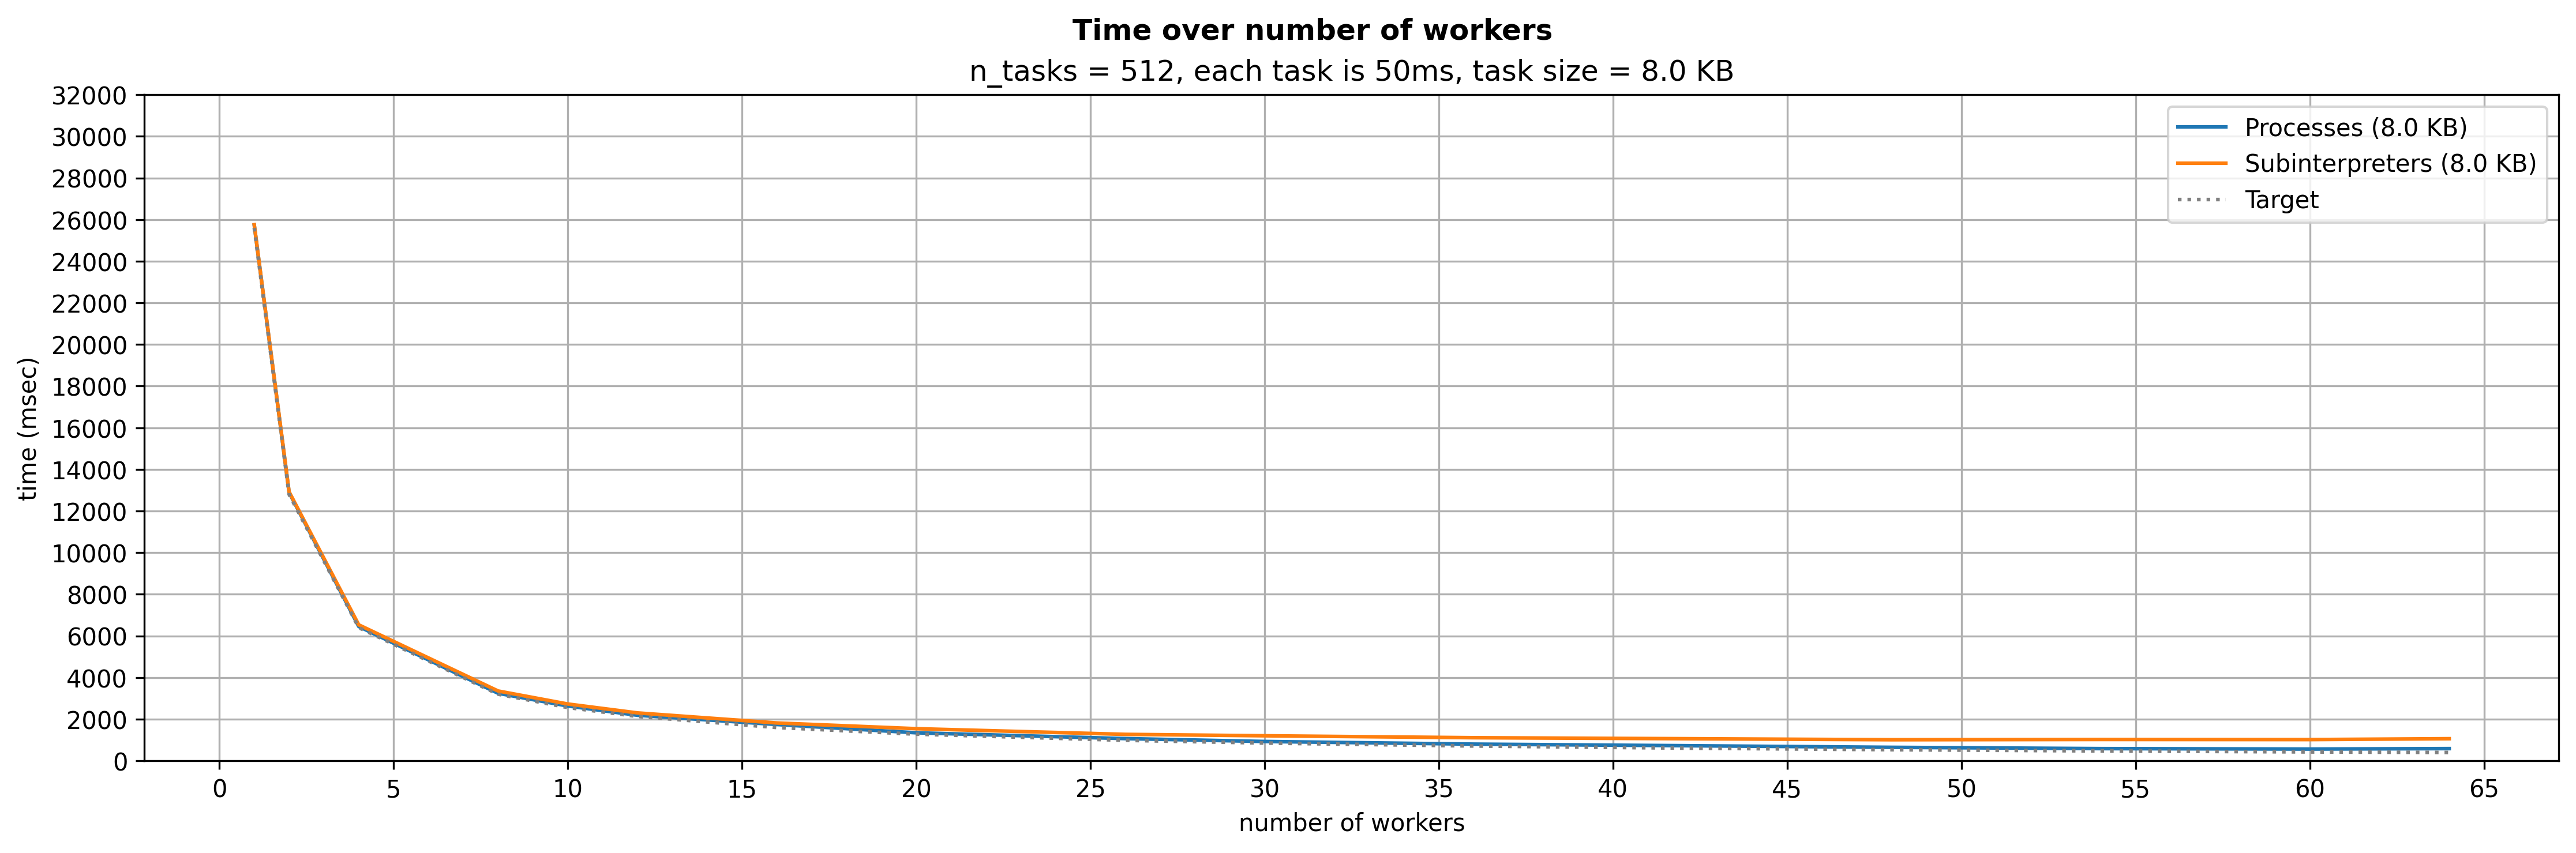

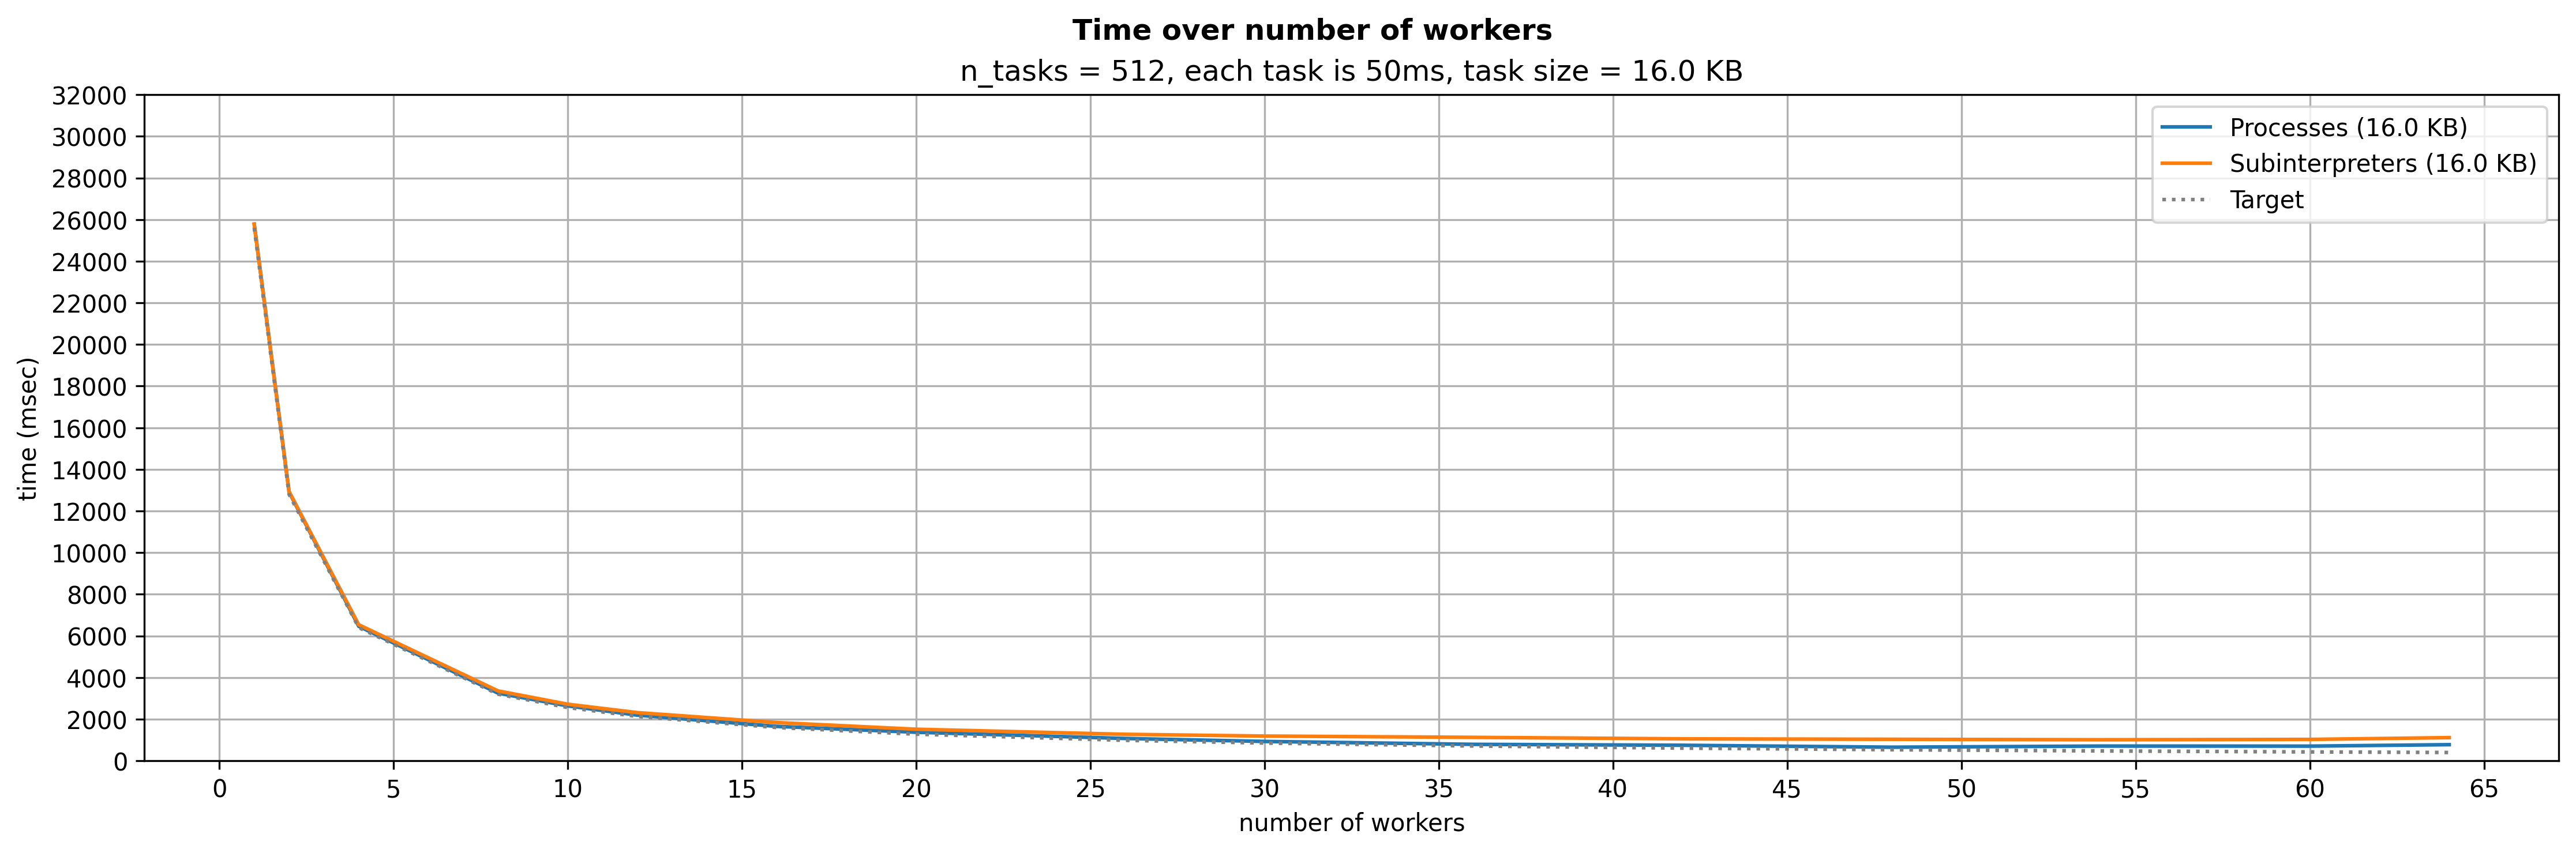

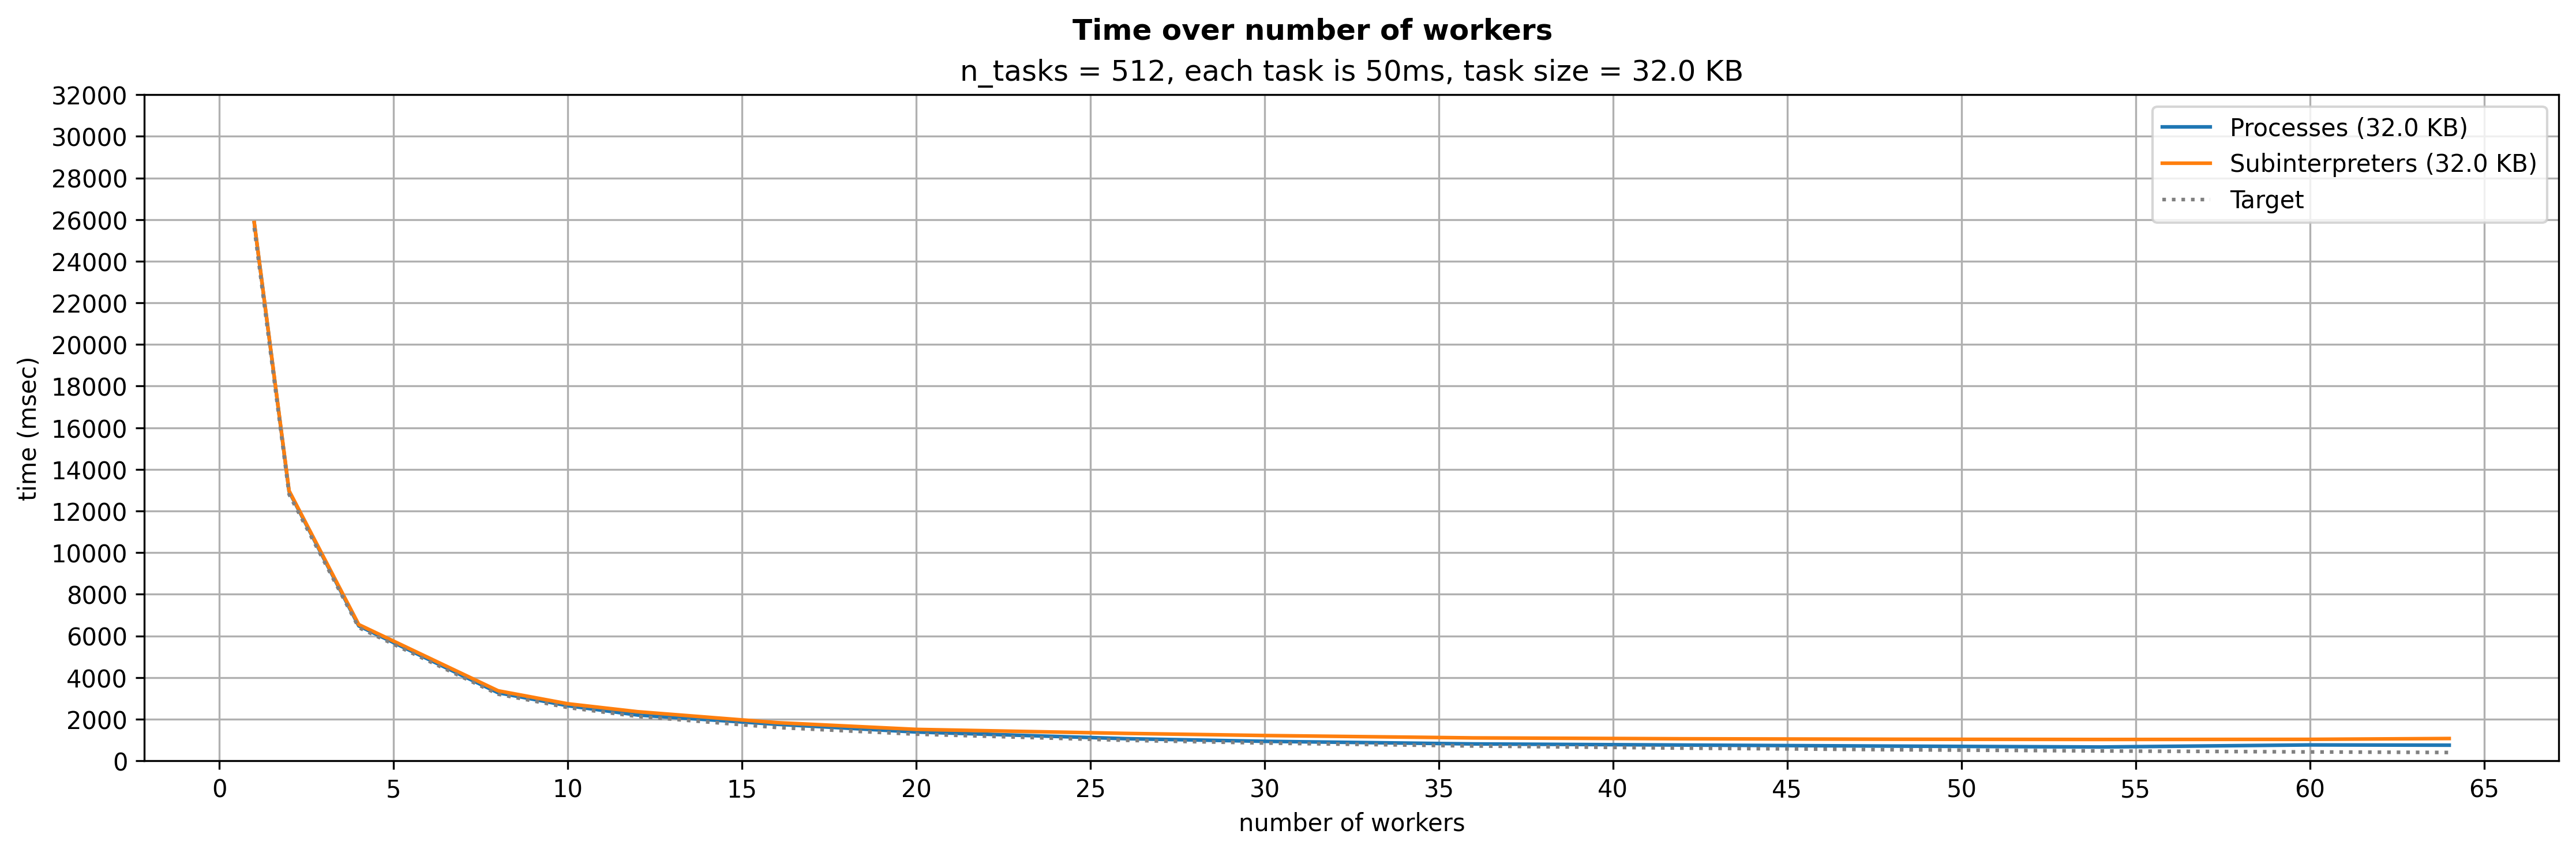

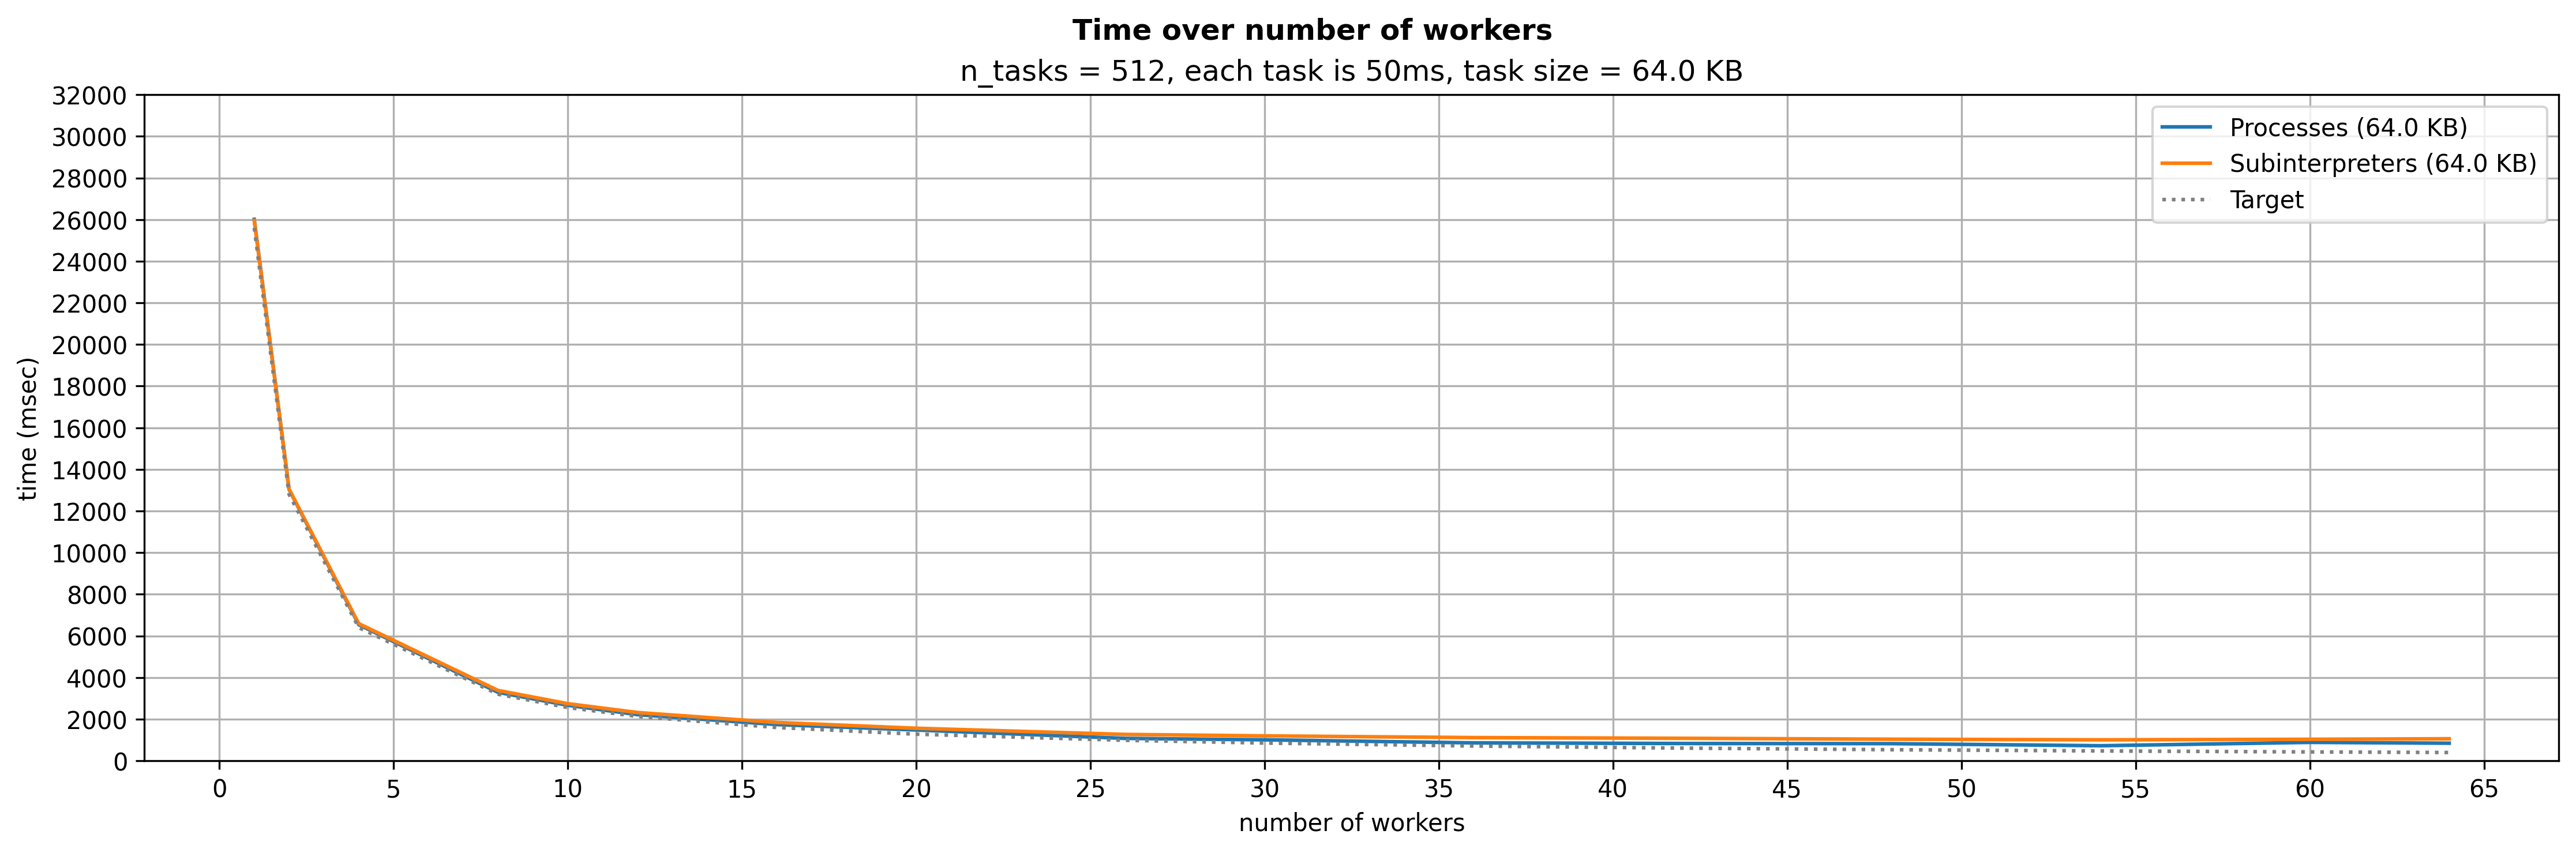

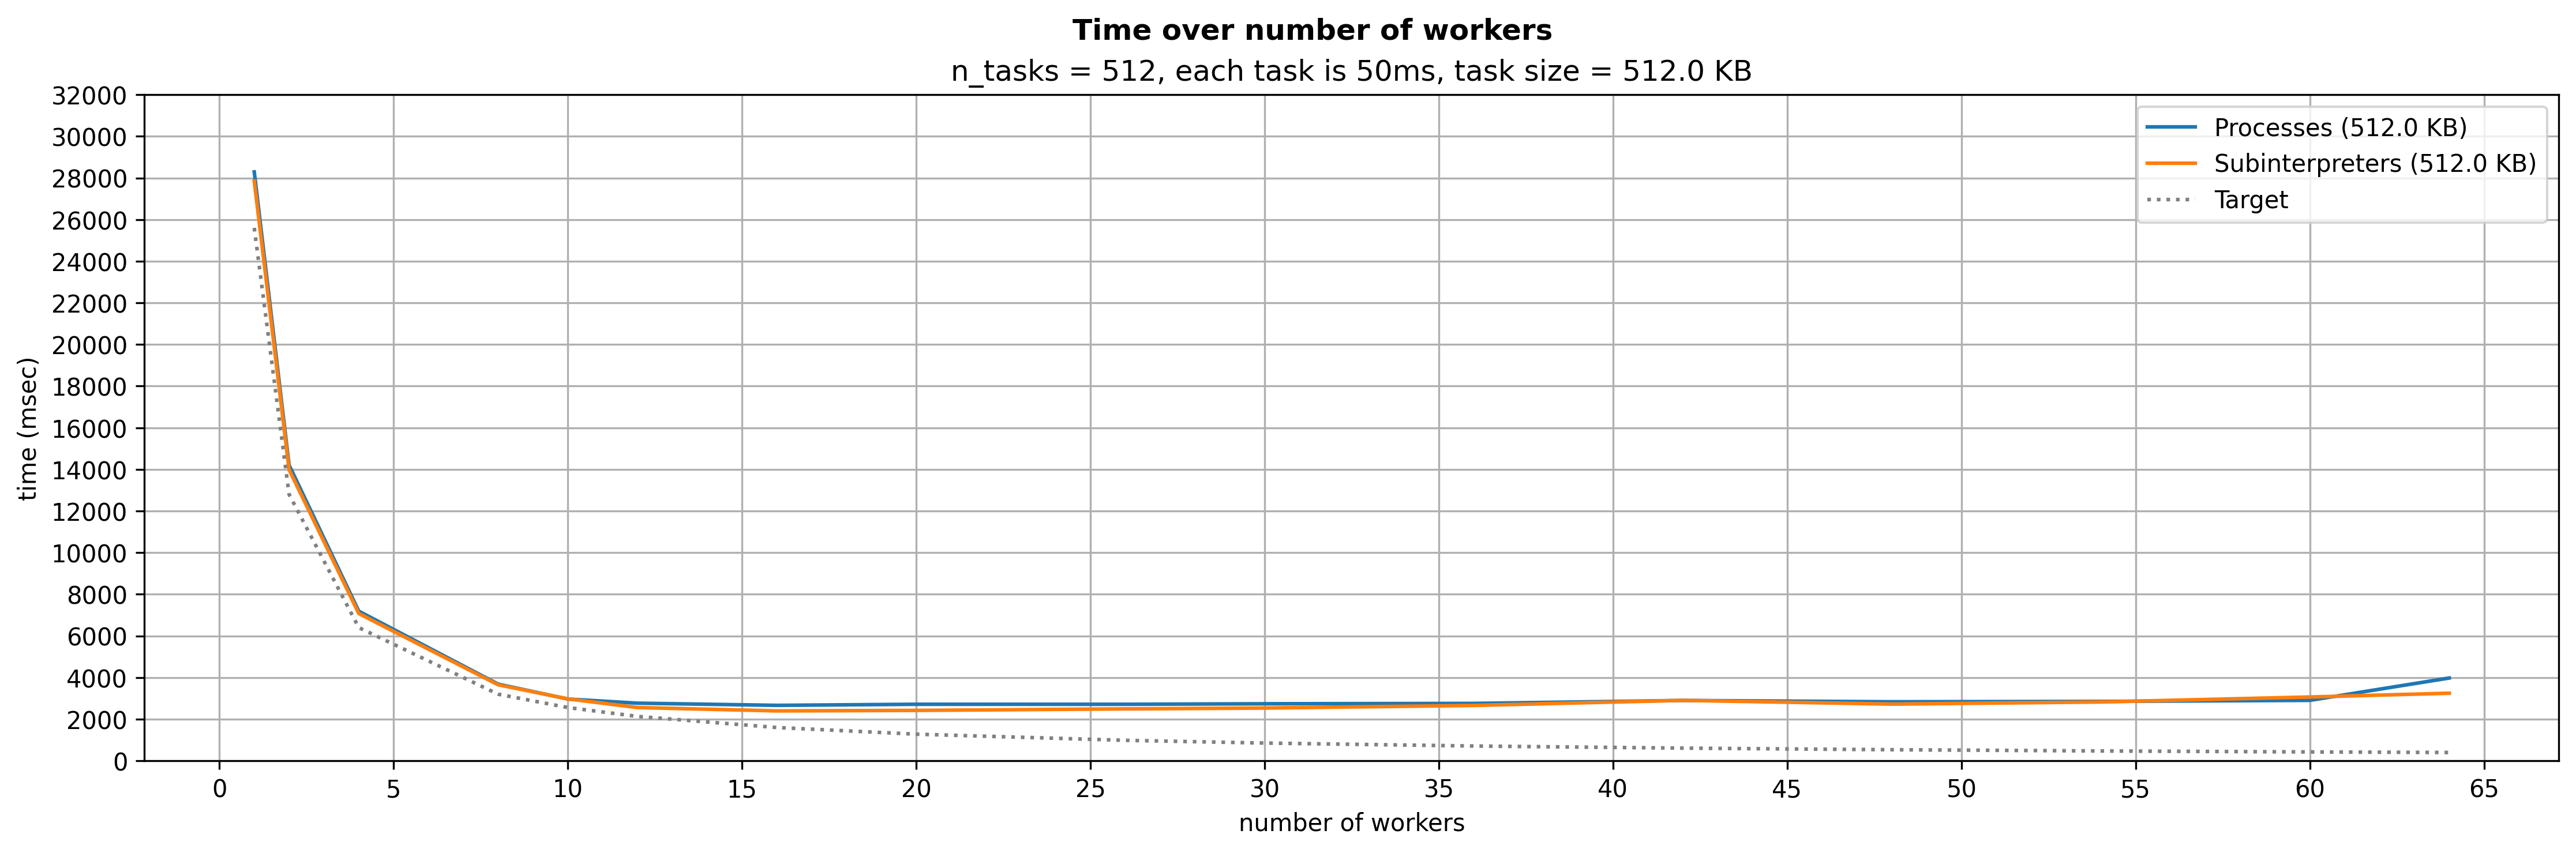

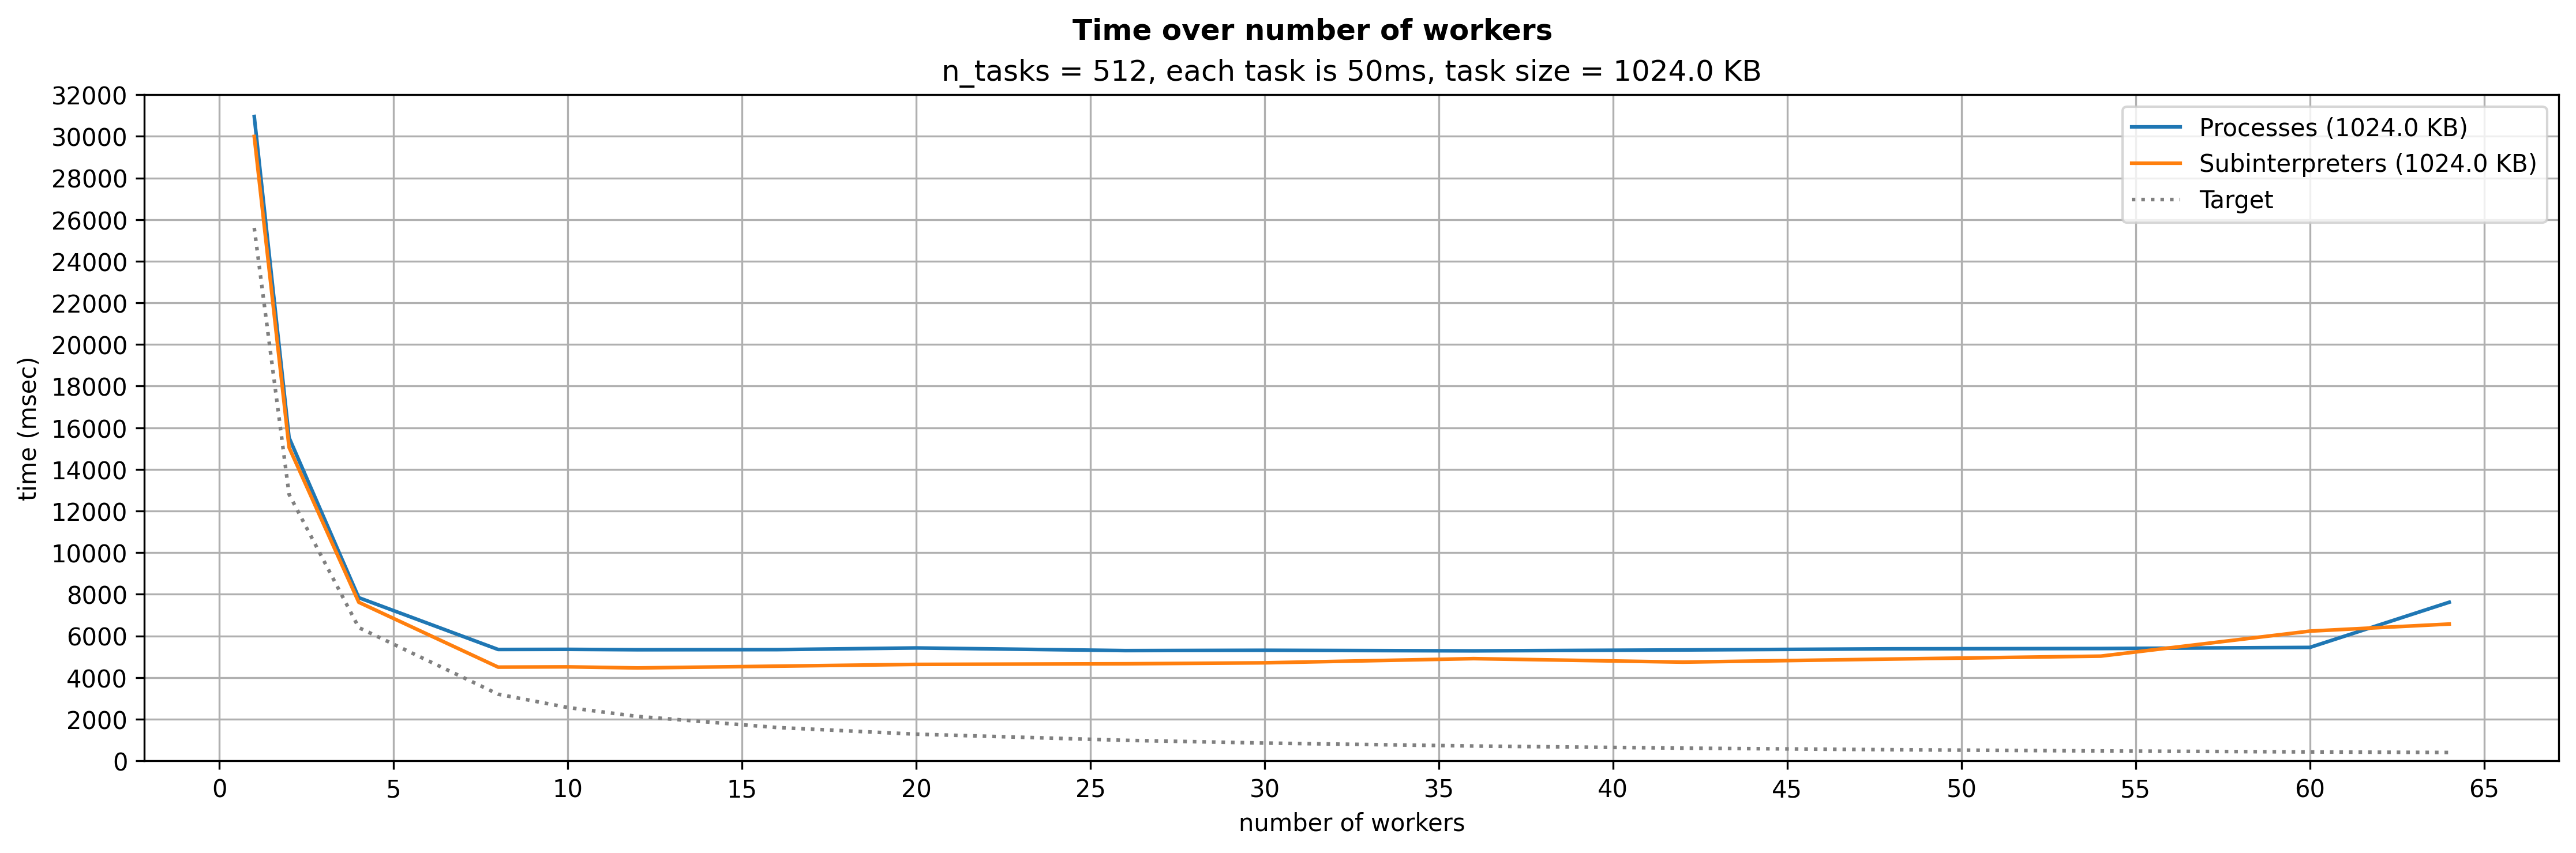

In [6]:
for i in range(len(subinterpreters)):
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    axs.grid()
    # Setting the number of ticks
    plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
    plt.locator_params(axis='y', nbins=24)
    plt.plot(x_axis_workers, processes[i][1], label=f"Processes ({processes[i][0] / 1024} KB)")
    plt.plot(x_axis_workers, subinterpreters[i][1], label=f"Subinterpreters ({subinterpreters[i][0] / 1024} KB)")
    plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")

    axs.set_xlabel("number of workers")
    axs.set_ylabel("time (msec)")
    axs.set_ylim(ymin=0, ymax=32000)

    plt.suptitle('Time over number of workers', y=0.97, fontweight="bold")
    plt.title(f"{subtitle}, task size = {processes[i][0] / 1024} KB")
    plt.legend()
    #savefig("stream_service_time")
    plt.show()

In [7]:
"""subinterpreters = []
subinterpreters.append([[1], [25715.454]])#bytes = 1024 ms = 50
subinterpreters.append([[1], [25737.9]] )#tes = 4096 ms = 50
subinterpreters.append([[1], [25753.87]] )#ytes = 8192 ms = 50
subinterpreters.append([[1], [25786.913]])#bytes = 16384 ms = 50
subinterpreters.append([[1], [25858.693]])#bytes = 32768 ms = 50
subinterpreters.append([[1], [25962.14]] )#ytes = 65536 ms = 50
subinterpreters.append([[1], [27846.516]])#bytes = 524288 ms = 50
subinterpreters.append([[1], [29993.647]])#bytes = 1048576 ms = 50
subinterpreters.append([[2], [12910.117]])#bytes = 1024 ms = 50
subinterpreters.append([[2], [12919.113]])#bytes = 4096 ms = 50
subinterpreters.append([[2], [12921.833]])#bytes = 8192 ms = 50
subinterpreters.append([[2], [12942.181]])#bytes = 16384 ms = 50
subinterpreters.append([[2], [12972.557]])#bytes = 32768 ms = 50
subinterpreters.append([[2], [13048.573]])#bytes = 65536 ms = 50
subinterpreters.append([[2], [13986.605]])#bytes = 524288 ms = 50
subinterpreters.append([[2], [15051.663]])#bytes = 1048576 ms = 50
subinterpreters.append([[4], [6525.265]] )#ytes = 1024 ms = 50
subinterpreters.append([[4], [6529.449]] )#ytes = 4096 ms = 50
subinterpreters.append([[4], [6531.109]] )#ytes = 8192 ms = 50
subinterpreters.append([[4], [6536.969]] )#ytes = 16384 ms = 50
subinterpreters.append([[4], [6544.35]] )#tes = 32768 ms = 50
subinterpreters.append([[4], [6589.976]] )#ytes = 65536 ms = 50
subinterpreters.append([[4], [7075.707]] )#ytes = 524288 ms = 50
subinterpreters.append([[4], [7616.295]] )#ytes = 1048576 ms = 50
subinterpreters.append([[8], [3345.488]] )#ytes = 1024 ms = 50
subinterpreters.append([[8], [3358.096]] )#ytes = 4096 ms = 50
subinterpreters.append([[8], [3353.923]] )#ytes = 8192 ms = 50
subinterpreters.append([[8], [3357.719]] )#ytes = 16384 ms = 50
subinterpreters.append([[8], [3364.174]] )#ytes = 32768 ms = 50
subinterpreters.append([[8], [3379.55]] )#tes = 65536 ms = 50
subinterpreters.append([[8], [3652.656]] )#ytes = 524288 ms = 50
subinterpreters.append([[8], [4500.883]] )#ytes = 1048576 ms = 50
subinterpreters.append([[10], [2717.39]] )#ytes = 1024 ms = 50
subinterpreters.append([[10], [2775.554]])#bytes = 4096 ms = 50
subinterpreters.append([[10], [2729.464]])#bytes = 8192 ms = 50
subinterpreters.append([[10], [2719.17]] )#ytes = 16384 ms = 50
subinterpreters.append([[10], [2740.711]])#bytes = 32768 ms = 50
subinterpreters.append([[10], [2745.638]] )#bytes = 65536 ms = 50
subinterpreters.append([[10], [2976.584]] )#bytes = 524288 ms = 50
subinterpreters.append([[10], [4514.186]] )#bytes = 1048576 ms = 50
subinterpreters.append([[12], [2302.908]] )#bytes = 1024 ms = 50
subinterpreters.append([[12], [2305.914]] )#bytes = 4096 ms = 50
subinterpreters.append([[12], [2301.214]] )#bytes = 8192 ms = 50
subinterpreters.append([[12], [2315.596]] )#bytes = 16384 ms = 50
subinterpreters.append([[12], [2359.889]] )#bytes = 32768 ms = 50
subinterpreters.append([[12], [2321.066]] )#bytes = 65536 ms = 50
subinterpreters.append([[12], [2558.977]] )#bytes = 524288 ms = 50
subinterpreters.append([[12], [4461.724]] )#bytes = 1048576 ms = 50
subinterpreters.append([[16], [1816.983]] )#bytes = 1024 ms = 50
subinterpreters.append([[16], [1828.406]] )#bytes = 4096 ms = 50
subinterpreters.append([[16], [1817.903]] )#bytes = 8192 ms = 50
subinterpreters.append([[16], [1838.529]] )#bytes = 16384 ms = 50
subinterpreters.append([[16], [1833.867]] )#bytes = 32768 ms = 50
subinterpreters.append([[16], [1842.767]] )#bytes = 65536 ms = 50
subinterpreters.append([[16], [2397.759]] )#bytes = 524288 ms = 50
subinterpreters.append([[16], [4546.902]] )#bytes = 1048576 ms = 50
subinterpreters.append([[20], [1507.073]] )#bytes = 1024 ms = 50
subinterpreters.append([[20], [1500.324]]) #bytes = 4096 ms = 50
subinterpreters.append([[20], [1543.998]]) #bytes = 8192 ms = 50
subinterpreters.append([[20], [1517.815]]) #bytes = 16384 ms = 50
subinterpreters.append([[20], [1510.578]]) #bytes = 32768 ms = 50
subinterpreters.append([[20], [1565.448]]) #bytes = 65536 ms = 50
subinterpreters.append([[20], [2421.365]])#bytes = 524288 ms = 50
subinterpreters.append([[20], [4632.774]])#bytes = 1048576 ms = 50
subinterpreters.append([[26], [1259.975]])#bytes = 1024 ms = 50
subinterpreters.append([[26], [1306.393]])#bytes = 4096 ms = 50
subinterpreters.append([[26], [1270.84]] )#ytes = 8192 ms = 50
subinterpreters.append([[26], [1273.357]])#bytes = 16384 ms = 50
subinterpreters.append([[26], [1317.722]])#bytes = 32768 ms = 50
subinterpreters.append([[26], [1268.4]] )#tes = 65536 ms = 50
subinterpreters.append([[26], [2494.465]])#bytes = 524288 ms = 50
subinterpreters.append([[26], [4661.351]])#bytes = 1048576 ms = 50
subinterpreters.append([[30], [1188.18]] )#ytes = 1024 ms = 50
subinterpreters.append([[30], [1201.502]])#bytes = 4096 ms = 50
subinterpreters.append([[30], [1203.052]])#bytes = 8192 ms = 50
subinterpreters.append([[30], [1189.689]])#bytes = 16384 ms = 50
subinterpreters.append([[30], [1215.491]])#bytes = 32768 ms = 50
subinterpreters.append([[30], [1198.39]] )#ytes = 65536 ms = 50
subinterpreters.append([[30], [2534.668]])#bytes = 524288 ms = 50
subinterpreters.append([[30], [4707.381]])#bytes = 1048576 ms = 50
subinterpreters.append([[36], [1094.897]])#bytes = 1024 ms = 50
subinterpreters.append([[36], [1110.086]])#bytes = 4096 ms = 50
subinterpreters.append([[36], [1110.158]])#bytes = 8192 ms = 50
subinterpreters.append([[36], [1127.309]])#bytes = 16384 ms = 50
subinterpreters.append([[36], [1101.249]])#bytes = 32768 ms = 50
subinterpreters.append([[36], [1116.59]] )#ytes = 65536 ms = 50
subinterpreters.append([[36], [2660.185]])#bytes = 524288 ms = 50
subinterpreters.append([[36], [4908.726]])#bytes = 1048576 ms = 50
subinterpreters.append([[42], [1050.69]] )#ytes = 1024 ms = 50
subinterpreters.append([[42], [1065.954]])#bytes = 4096 ms = 50
subinterpreters.append([[42], [1062.782]])#bytes = 8192 ms = 50
subinterpreters.append([[42], [1056.278]])#bytes = 16384 ms = 50
subinterpreters.append([[42], [1059.469]])#bytes = 32768 ms = 50
subinterpreters.append([[42], [1081.704]])#bytes = 65536 ms = 50
subinterpreters.append([[42], [2904.819]])#bytes = 524288 ms = 50
subinterpreters.append([[42], [4740.684]])#bytes = 1048576 ms = 50
subinterpreters.append([[48], [1001.322]])#bytes = 1024 ms = 50
subinterpreters.append([[48], [1005.302]])#bytes = 4096 ms = 50
subinterpreters.append([[48], [1012.376]])#bytes = 8192 ms = 50
subinterpreters.append([[48], [1034.64]] )#ytes = 16384 ms = 50
subinterpreters.append([[48], [1036.908]])#bytes = 32768 ms = 50
subinterpreters.append([[48], [1038.02]] )#ytes = 65536 ms = 50
subinterpreters.append([[48], [2723.644]])#bytes = 524288 ms = 50
subinterpreters.append([[48], [4888.974]])#bytes = 1048576 ms = 50
subinterpreters.append([[54], [1030.547]])#bytes = 1024 ms = 50
subinterpreters.append([[54], [1012.394]])#bytes = 4096 ms = 50
subinterpreters.append([[54], [1025.382]])#bytes = 8192 ms = 50
subinterpreters.append([[54], [1012.302]])#bytes = 16384 ms = 50
subinterpreters.append([[54], [1025.585]])#bytes = 32768 ms = 50
subinterpreters.append([[54], [1008.892]])#bytes = 65536 ms = 50
subinterpreters.append([[54], [2826.574]])#bytes = 524288 ms = 50
subinterpreters.append([[54], [5028.804]])#bytes = 1048576 ms = 50
subinterpreters.append([[60], [1020.312]])#bytes = 1024 ms = 50
subinterpreters.append([[60], [1010.54]] )#ytes = 4096 ms = 50
subinterpreters.append([[60], [1020.192]])#bytes = 8192 ms = 50
subinterpreters.append([[60], [1028.867]])#bytes = 16384 ms = 50
subinterpreters.append([[60], [1032.312]])#bytes = 32768 ms = 50
subinterpreters.append([[60], [1034.613]])#bytes = 65536 ms = 50
subinterpreters.append([[60], [3065.846]])#bytes = 524288 ms = 50
subinterpreters.append([[60], [6230.495]])#bytes = 1048576 ms = 50
subinterpreters.append([[64], [1058.798]])#bytes = 1024 ms = 50
subinterpreters.append([[64], [1062.273]])#bytes = 4096 ms = 50
subinterpreters.append([[64], [1062.525]])#bytes = 8192 ms = 50
subinterpreters.append([[64], [1114.469]])#bytes = 16384 ms = 50
subinterpreters.append([[64], [1071.178]])#bytes = 32768 ms = 50
subinterpreters.append([[64], [1060.659]])#bytes = 65536 ms = 50
subinterpreters.append([[64], [3247.174]])#bytes = 524288 ms = 50
subinterpreters.append([[64], [6570.184]])#bytes = 1048576 ms = 50

data = subinterpreters
mp = {}
for proc in data:
    mp[proc[0][0]] = []
for proc in data:
    mp[proc[0][0]].append(proc[1][0])
print(mp)
final = []
for i in range(len(mp[proc[0][0]])):
    row = []
    final.append(row)
    for nw, res in mp.items():
        row.append(res[i])
print(final)"""



'subinterpreters = []\nsubinterpreters.append([[1], [25715.454]])#bytes = 1024 ms = 50\nsubinterpreters.append([[1], [25737.9]] )#tes = 4096 ms = 50\nsubinterpreters.append([[1], [25753.87]] )#ytes = 8192 ms = 50\nsubinterpreters.append([[1], [25786.913]])#bytes = 16384 ms = 50\nsubinterpreters.append([[1], [25858.693]])#bytes = 32768 ms = 50\nsubinterpreters.append([[1], [25962.14]] )#ytes = 65536 ms = 50\nsubinterpreters.append([[1], [27846.516]])#bytes = 524288 ms = 50\nsubinterpreters.append([[1], [29993.647]])#bytes = 1048576 ms = 50\nsubinterpreters.append([[2], [12910.117]])#bytes = 1024 ms = 50\nsubinterpreters.append([[2], [12919.113]])#bytes = 4096 ms = 50\nsubinterpreters.append([[2], [12921.833]])#bytes = 8192 ms = 50\nsubinterpreters.append([[2], [12942.181]])#bytes = 16384 ms = 50\nsubinterpreters.append([[2], [12972.557]])#bytes = 32768 ms = 50\nsubinterpreters.append([[2], [13048.573]])#bytes = 65536 ms = 50\nsubinterpreters.append([[2], [13986.605]])#bytes = 524288 ms 